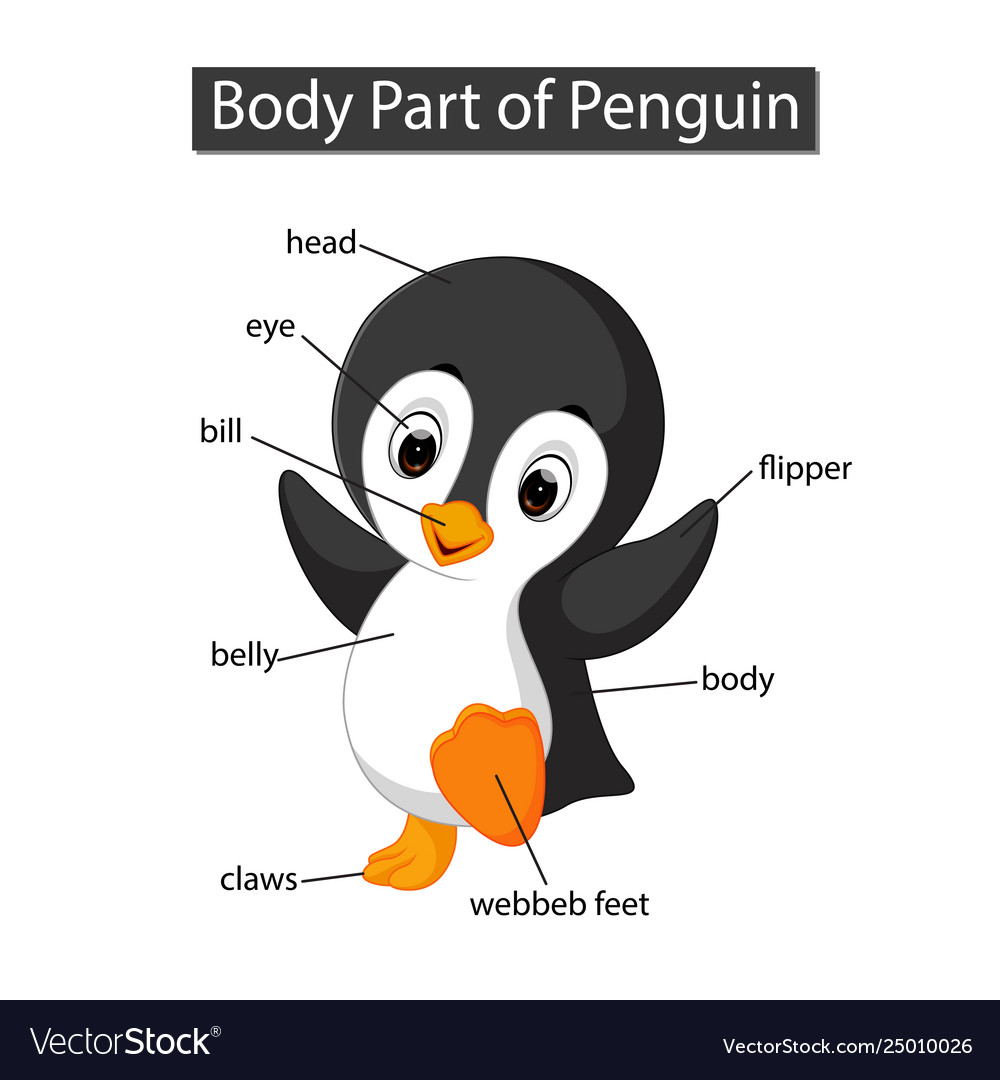

Columns in the dataset

Species: penguin species (Chinstrap, Adélie, or Gentoo)

Island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)

culmen_length_mm: culmen length (mm)

culmen_depth_mm: culmen depth (mm)

flipper_length_mm: flipper length (mm)

body_mass_g: body mass (g)

Sex: penguin sex

In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

f:\python-3.6\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
f:\python-3.6\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data = pd.read_csv('penguins_size.csv')
# Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


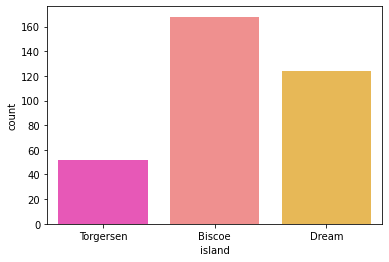

In [4]:
sns.countplot(data['island'],palette='spring');

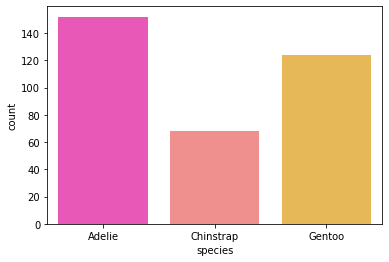

In [5]:
sns.countplot(data['species'],palette='spring');

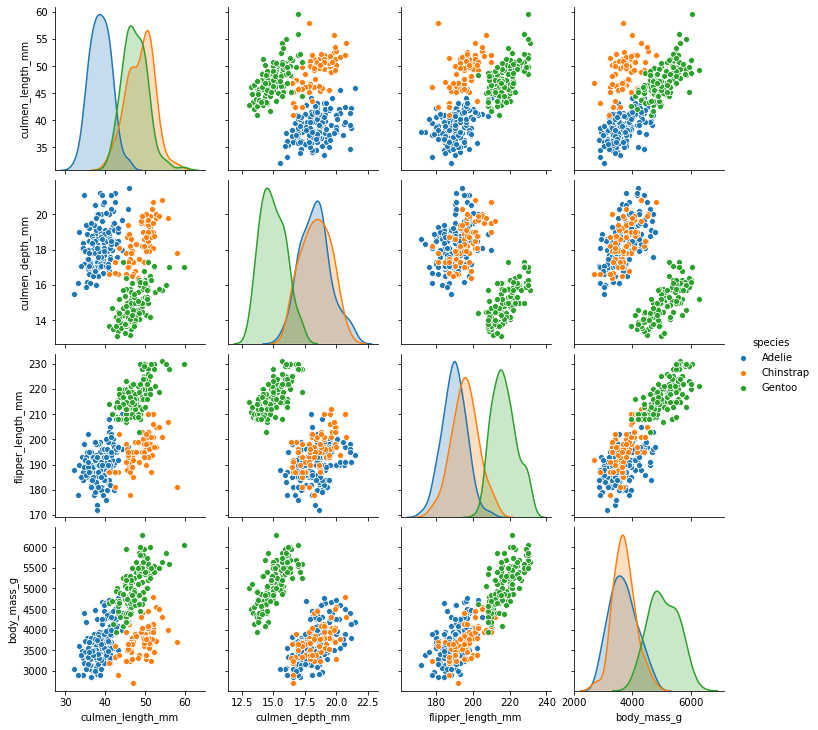

In [6]:
sns.pairplot(data,hue='species')

We can see clusters are easily separable in the cases:

culmen_length_mm vs culmen_depth_mm ;

culmen_length_mm vs flipper_length_mm ;

culmen_length_mm vs body_mass_g.

Let's explore distribution of our data.


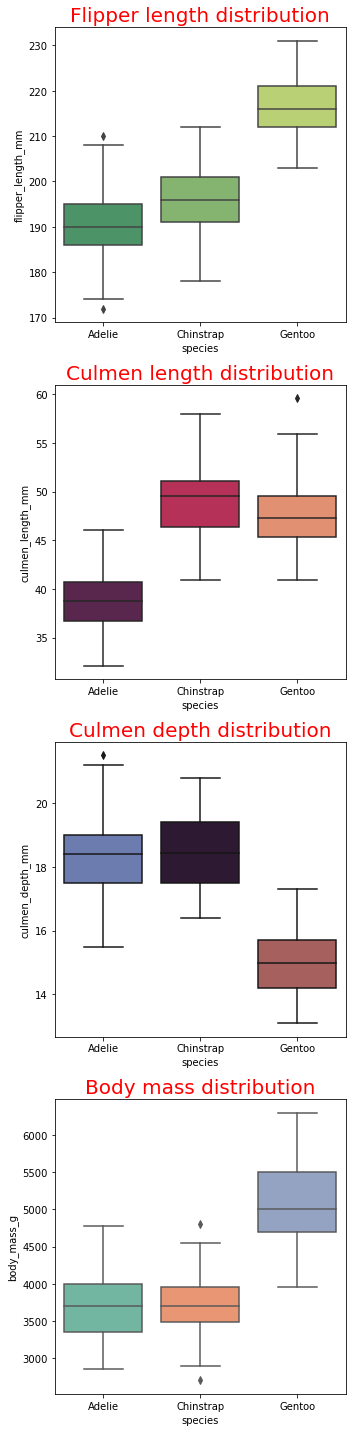

In [7]:
print("Let's explore distribution of our data.")
fig,axes=plt.subplots(4,1,figsize=(5,20))
sns.boxplot(x=data.species,y=data.flipper_length_mm,ax=axes[0],palette='summer')
axes[0].set_title("Flipper length distribution",fontsize=20,color='Red')
sns.boxplot(x=data.species,y=data.culmen_length_mm,ax=axes[1],palette='rocket')
axes[1].set_title("Culmen length distribution",fontsize=20,color='Red')
sns.boxplot(x=data.species,y=data.culmen_depth_mm,ax=axes[2],palette='twilight')
axes[2].set_title("Culmen depth distribution",fontsize=20,color='Red')
sns.boxplot(x=data.species,y=data.body_mass_g,ax=axes[3],palette='Set2')
axes[3].set_title("Body mass distribution",fontsize=20,color='Red')
plt.tight_layout()

Body Mass Distribution


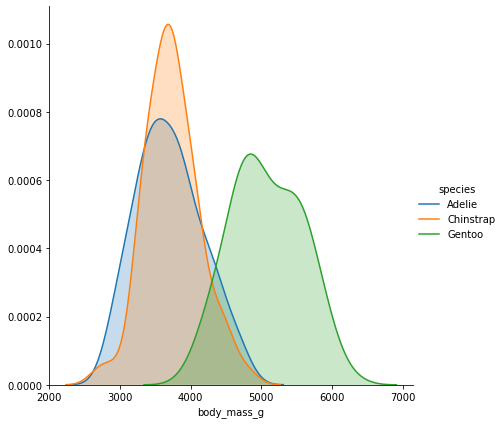

In [8]:
print('Body Mass Distribution')
sns.FacetGrid(data, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()

#### Correlation of the variables

culmen_length vs culmen_depth


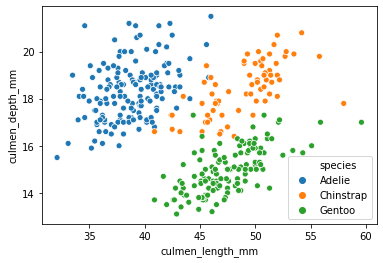

In [9]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=data, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.show()

culmen_depth vs flipper_length


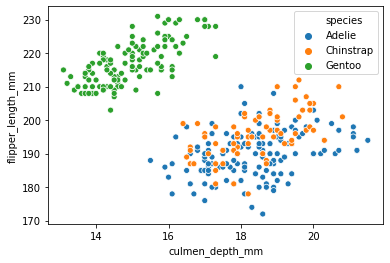

In [10]:
print('culmen_depth vs flipper_length')
sns.scatterplot(data=data, x='culmen_depth_mm', y='flipper_length_mm', hue='species')
plt.show()

culmen_depth vs body_mass


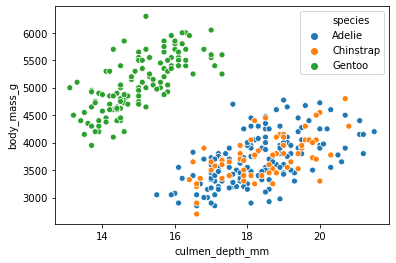

In [11]:
print('culmen_depth vs body_mass')
sns.scatterplot(data=data, x='culmen_depth_mm', y='body_mass_g', hue='species')
plt.show()

culmen_length vs body_mass


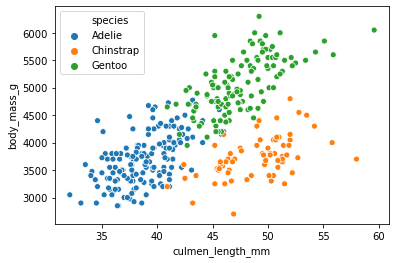

In [12]:
print('culmen_length vs body_mass')
sns.scatterplot(data=data, x='culmen_length_mm', y='body_mass_g', hue='species')
plt.show()

flipper_length vs body_mass


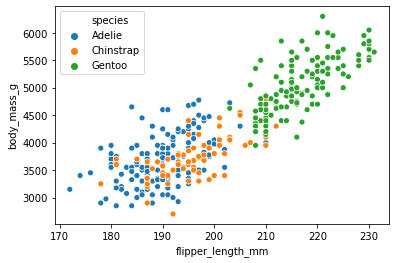

In [13]:
print('flipper_length vs body_mass')
sns.scatterplot(data=data, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()

culmen_length vs flipper_length


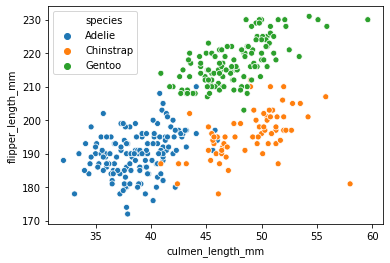

In [14]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=data, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()

In [15]:
print("Mean body mass index distribution")
data.groupby(['species','sex']).mean()['body_mass_g'].round(2)

Mean body mass index distribution


species    sex   
Adelie     FEMALE    3368.84
           MALE      4043.49
Chinstrap  FEMALE    3527.21
           MALE      3938.97
Gentoo     .         4875.00
           FEMALE    4679.74
           MALE      5484.84
Name: body_mass_g, dtype: float64

In [16]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [17]:
100*data.isnull().sum()/len(data)

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

Percentage of missing data is very less. 

Let's impute it with median in numerical features and mode in categorical feature. Here, I have used .fillna method from pandas library.

Missing values can also be filled using pre-defined functions like SimpleImputer from sklearn.

In [18]:
data['sex'].fillna(data['sex'].mode()[0],inplace=True)
col_to_be_imputed = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g']
for item in col_to_be_imputed:
    data[item].fillna(data[item].mean(),inplace=True)

In [19]:
data.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [20]:
data.island.value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [21]:
data.sex.value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

### Oops! Where did this '.' entry came from?

In [22]:
data[data['sex']=='.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [23]:
data.loc[336,'sex'] = 'FEMALE'

In [24]:
# Target variable can also be encoded using sklearn.preprocessing.LabelEncoder
data['species']=data['species'].map({'Adelie':0,'Gentoo':1,'Chinstrap':2})

# creating dummy variables for categorical features
dummies = pd.get_dummies(data[['island','sex']],drop_first=True)

In [25]:
# we do not standardize dummy variables 
df_to_be_scaled = data.drop(['island','sex'],axis=1)
target = df_to_be_scaled.species
df_feat= df_to_be_scaled.drop('species',axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_feat)
df_scaled = scaler.transform(df_feat)
df_scaled = pd.DataFrame(df_scaled,columns=df_feat.columns[:4])
df_preprocessed = pd.concat([df_scaled,dummies,target],axis=1)
df_preprocessed.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE,species
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789,0,1,1,0
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168,0,1,0,0
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003,0,1,0,0
3,-1.307172e-15,1.806927e-15,0.000000,0.000000,0,1,1,0
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517,0,1,0,0


#### K-Nearest Neighbours Classification

It is a supervised learning algorithm which can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

With the given data, KNN can classify new, unlabelled data by analysis of the k number of the nearest data points.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score 

# We need to split data for supervised learning models.
X_train, X_test, y_train, y_test = train_test_split(df_preprocessed.drop('species',axis=1),target,test_size=0.50)

Random = RandomForestClassifier()
Random.fit(X_train,y_train)
preds_knn = Random.predict(X_test)
print(confusion_matrix(y_test,preds_knn))

[[73  0  1]
 [ 1 64  0]
 [ 0  0 33]]


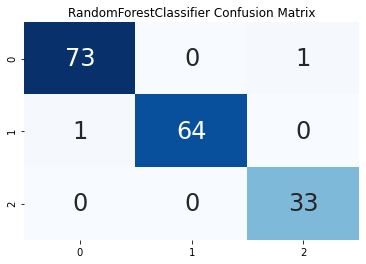

In [38]:
plt.title("RandomForestClassifier Confusion Matrix")
sns.heatmap(confusion_matrix(y_test,preds_knn),annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24});

In [39]:
print(classification_report(y_test,preds_knn))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        74
           1       1.00      0.98      0.99        65
           2       0.97      1.00      0.99        33

    accuracy                           0.99       172
   macro avg       0.99      0.99      0.99       172
weighted avg       0.99      0.99      0.99       172



In [40]:
print(accuracy_score(y_test,preds_knn))

0.9883720930232558


In [41]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9767
Test set score: 0.9826
